## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the **Code cells** and your answers in the **Markdown cells** of the Jupyter notebook. Ensure that the solution is written neatly enough to for the graders to understand and follow.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the **.ipynb** file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **Thursday, 11th April 2024 at 11:59 pm**. 

5. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

In [ ]:
#| echo: false
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

## 1) Bias-Variance Trade-off for Regression **(32 points)**

The main goal of this question is to understand and visualize the bias-variance trade-off in a regression model by performing repetitive simulations.

The conceptual clarity about bias and variance will help with the main logic behind creating many models that will come up later in the course.

### a)

First, you need to implement the underlying function of the population you want to sample data from. Assume that the function is the [Bukin function](https://www.sfu.ca/~ssurjano/bukin6.html). Implement it as a user-defined function and run it with the test cases below to make sure it is implemented correctly. **(3 points)**

**Note:** It would be more useful to have only one input to the function. You can treat the input as an array of two elements.

In [ ]:
#| eval: false

print(Bukin(np.array([1,2]))) # The output should be 141.177
print(Bukin(np.array([6,-4]))) # The output should be 208.966
print(Bukin(np.array([0,1]))) # The output should be 100.1

### b)

Using the following assumptions, sample a test dataset with 100 observations from the underlying function. Remember how the test dataset is supposed to be sampled for bias-variance calculations. **No loops are allowed for this question - .apply should be very useful and actually simpler to use.** **(4 points)**

Assumptions:

- The first predictor, $x_1$, comes from a uniform distribution between -15 and 5. ($U[-15, -5]$)
- The second predictor, $x_2$, comes from a uniform distribution between -3 and 3. ($U[-3, 3]$)
- Use `np.random.seed(100)` for reproducibility.

### c)

Create an empty DataFrame with columns named **degree**, **bias_sq** and **var**. This will be useful to store the analysis results in this question. **(1 point)**

### d)

Sample 100 training datasets to calculate the bias and the variance of a Linear Regression model that predicts data coming from the underlying Bukin function. You need to repeat this process with polynomial transformations from degree 1 (which is the original predictors) to degree 7. For each degree, store the degree, bias-squared and variance values in the DataFrame. **(15 points)**

**Note:**

- For a linear regression model, bias refers to squared bias
- Assume that the noise in the population is a zero-mean Gaussian with a standard deviation of 10. ($N(0,10)$)
- Keep the training data size the same as the test data size.
- You need both the interactions and the higher-order transformations in your polynomial predictors.
- For $i^{th}$ training dataset, you can consider using `np.random.seed(i)` for reproducibility.

### e)

Using the results stored in the DataFrame, plot the (1) expected mean squared error, (2) expected squared bias, (3) expected variance, and (4) the expected sum of squared bias, variance and noise variance *(i.e., summation of 2, 3, and noise variance)*, against the degree of the predictors in the model. **(5 points)** 

Make sure you add a legend to label the three lineplots. **(1 point)**

### f)

What is the degree of the optimal model? **(1 point)** What are the squared bias, variance and mean squared error for that degree? **(2 points)**

## 2) Low-Bias-Low-Variance Model via Regularization (25 points)

The main goal of this question is to further reduce the total error by regularization - in other words, to implement the low-bias-low-variance model for the underlying function and the data coming from it.

### a)

First of all, explain why it is not guaranteed for the optimal model (with the optimal degree) in Question 1 to be the low-bias-low-variance model. **(2 points)** Why would regularization be necessary to achieve that model? **(2 points)**

### b)

Before repeating the process in Question 1, you should see from the figure in 1e and the results in 1f that there is no point in trying some degrees again with regularization. Find out these degrees and explain why you should not use them for this question, **considering how regularization affects the bias and the variance of a model.** **(3 points)**

### c)

Repeat 1c and 1d with Ridge regularization. **Exclude the degrees you found in 2b and also degree 7**. Use Leave-One-Out (LOO) cross-validation (CV) to tune the model hyperparameter and use `neg_root_mean_squared_error` as the scoring metric. **(7 points)**

Consider hyperparamter values in the range \[1, 100\].

### d)

Repeat part 1e with Ridge regularization, using the results from 2c. **(2 points)**

### e) 

What is the degree of the optimal Ridge Regression model? **(1 point)** What are the bias-squared, variance and total error values for that degree? **(1 point)** How do they compare to the Linear Regression model results? **(2 points)**

### f)

Is the regularization successful in reducing the total error of the regression model? **(2 points)** Explain the results in 2e in terms of how bias and variance change with regularization. **(3 points)**

## 3) Bias-Variance Trade-off for Classification (38 points)

Now, it is time to understand and visualize the bias-variance trade-off in a classification model. As we covered in class, the error calculations for classification are different than regression, so it is necessary to understand the bias-variance analysis for classification as well.

First of all, you need to visualize the underlying boundary between the classes in the population. Run the given code that implements the following:

- 2000 test observations are sampled from a population with two predictors.
- Each predictor is uniformly distributed between -15 and 15. ($U[-15, 15]$)
- The underlying boundary between the classes is a circle with radius 10.
- The noise in the population is a 30% chance that the observation is misclassified.

In [5]:
# Number of observations
n = 2000

np.random.seed(111)

# Test predictors
x1 = np.random.uniform(-15, 15, n)
x2 = np.random.uniform(-15, 15, n)
X_test = pd.DataFrame({'x1': x1, 'x2': x2})

# Underlying boundary
boundary = (x1**2) + (x2**2)

# Test response (no noise!)
y_test_wo_noise = (boundary < 100).astype(int)

# Test response with noise (for comparison)
noise_prob = 0.3
num_noisy_obs = int(noise_prob*n)

y_test_w_noise = y_test_wo_noise.copy()
noise_indices = np.random.choice(range(len(y_test_w_noise)), num_noisy_obs, replace = False)
y_test_w_noise[noise_indices] = 1 - y_test_wo_noise[noise_indices]

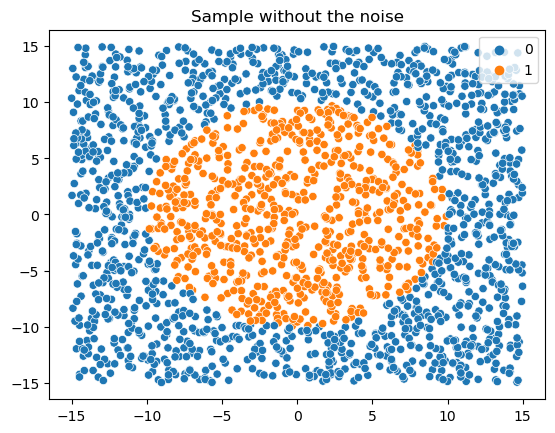

In [7]:
#| eval: false

sns.scatterplot(x = x1, y = x2, hue=y_test_wo_noise)
plt.title('Sample without the noise')
plt.show()

In [1]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/s1.jpg")

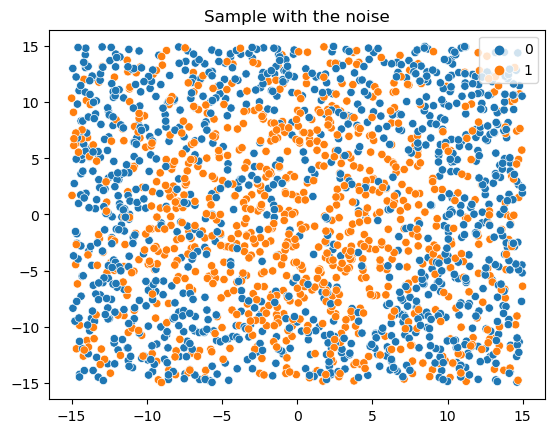

In [8]:
#| eval: false

sns.scatterplot(x = x1, y = x2, hue=y_test_w_noise)
plt.title('Sample with the noise')
plt.show()

In [2]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/s2.jpg")

### a)

Create an empty DataFrame with columns named **K**, **bias**, **var** and **noise**. This will be useful to store the analysis results in this question. **(1 point)**

### b)

Sample 100 training datasets to calculate the bias and the variance of a K-Nearest Neighbors (KNN) Classifier that predicts data coming from the population with the circular underlying boundary. You need to repeat this process with a K value **from 10 to 150, with a stepsize of 10**. For each K, store the following values in the DataFrame:

(1) K, 

(2) bias, 

(3) variance, 

(4) expected loss computed directly using the true response and predictions, 

(5) expected loss computed as (expected Bias) + ($c_2$ expected variance) + ($c_1$ expected noise)

**(20 points)**

Note:

- Keep the training data size the same as the test data size.
- The given code should help you both with sampling the training data and adding noise to the training responses.
- For $i^{th}$ training dataset, you can consider using `np.random.seed(i)` for reproducibility.
- To check the progress of the code while running, a simple but efficient method is to add a `print(K)` line in the loop.

### c)

Using the results stored in the DataFrame, plot the bias and the variance against the K value on one figure, and the expected loss (computed directly) & expected loss computed as (expected Bias) + ($c_2$expected variance) + ($c_1$expected noise) against the K value **on a separate figure**. **(5 points)** Make sure you add a legend to label the lineplots in the first figure. **(1 point)**

### d)

What is the K of the optimal model? **(1 point)** What are the bias, variance and expected loss (computed either way) for that K? **(2 points)**

### e) 

In part c, you should see the variance leveling off after a certain K value. Explain why this is the case, considering the effect of the K value on a KNN model. **(2 points)** 

The level of complexity of the KNN model decreases as K increases. After a certain K value, the model cannot get any simpler, as it becomes the equivalent of an intercept-only model, which just returns the majority class in the dataset for a classification task. Since the level of complexity is constant and the noise is constant, the variance of the model change negligibly (due to the randomness of training datasets) but mostly levels off.

### f)

Lastly, visualize the decision boundary of a KNN Classifier with **high-bias-low-variance (option 1)** and **low-bias-high-variance (option 2)**, using data from the same population.

- For each option, pick a K value (1 and 90 would be good numbers.) **You are expected to know which number belongs to which option.**
- Sample a training dataset. (Use `np.random.seed(1)`.)
- Using the training dataset, train a KNN model with the K value you picked.
- The rest of the code is given below for you.

Note that you need to produce two figures. **(2x2 = 4 points)** Put titles on the figures to describe which figure is which option. **(2 points)**

In [ ]:
#| eval: false

# Develop and save the model as the 'model' object before using the code
xx, yy = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-15, 15, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.scatterplot(x = x1, y = x2, hue=y_train, legend=False);
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2)

plt.title('____-bias-____-variance Model')